## This solution file contains the solution to the Task 1 of Spectrum Internship Drive.

First of all, the necessary imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

>The solution to the problem has been obtained step-by-step.

1. The *student-math.csv* file containing the student information is imported here with the<br> with the numpy function `pandas.read_csv()`.<br> The dataframe created is **stud**.

In [3]:
stud = pd.read_csv('../source-files/student-math.csv', sep = ';')

In [4]:
stud.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


2. New column **final_grade** contains the sum of grade *G1*, *G2* and *G3*.

In [5]:
stud['final_grade'] = np.sum(stud[['G1', 'G2', 'G3']], axis = 1)

In [6]:
stud['final_grade']

0      17
1      16
2      25
3      44
4      26
       ..
390    27
391    46
392    25
393    33
394    26
Name: final_grade, Length: 395, dtype: int64

3. The columns *G1*, *G2* and *G3* form **stud** are removed.

In [7]:
stud.drop(['G1', 'G2', 'G3'], axis = 1, inplace = True)

In [8]:
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'final_grade'],
      dtype='object')

>There are no *G1*, *G2* and *G3* column in the above list of columns.

4. All the columns having binary value are replaced by number **1** and **0**.

In [9]:
cols = stud.columns

In [10]:
for col in cols:
    if stud[col].nunique() == 2:
        stud[col] = stud[col].map({stud[col].unique()[0]: 1, stud[col].unique()[1]: 0})

In [11]:
stud.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,final_grade
0,1,1,18,1,1,1,4,4,at_home,teacher,...,1,1,4,3,4,1,1,3,6,17
1,1,1,17,1,1,0,1,1,at_home,other,...,0,1,5,3,3,1,1,3,4,16
2,1,1,15,1,0,0,1,1,at_home,other,...,0,1,4,3,2,2,3,3,10,25
3,1,1,15,1,1,0,4,2,health,services,...,0,0,3,2,2,1,1,5,2,44
4,1,1,16,1,1,0,3,3,other,other,...,1,1,4,3,2,1,2,5,4,26


>The above **stud** dataframe has all the *binary* columns mapped with **1** and **0**.

5. A **scatter** plot is plotted between *studytime* and *final_grade*.

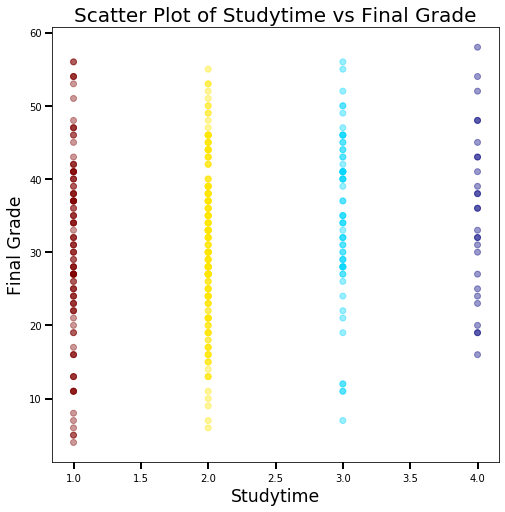

In [12]:
fig, ax = plt.subplots(figsize = (8, 8), squeeze = True)
ax.scatter('studytime', 'final_grade', data = stud, c = 'studytime', alpha = 0.4, cmap = plt.get_cmap('jet_r'))
ax.set_xlabel('Studytime', fontsize = 'xx-large')
ax.set_ylabel('Final Grade', fontsize = 'xx-large')
ax.tick_params(length = 7, width = 2)
ax.set_title('Scatter Plot of Studytime vs Final Grade', fontsize = 20)
plt.show()

- The above plot suggests that most of the students prefer the stydytime number **2**(*2 to 5 hours*).
- The least preferred studytime is number **4**(*$\gt10$ hours*).
- Studytime number **3**(*5 to 10 hours*) is probably the most suitable one as maximum student following<br> studytime **3** have *Final Grade* above 30.

 6. *Boxplot* of the columns **final_grade** and **studytime**.

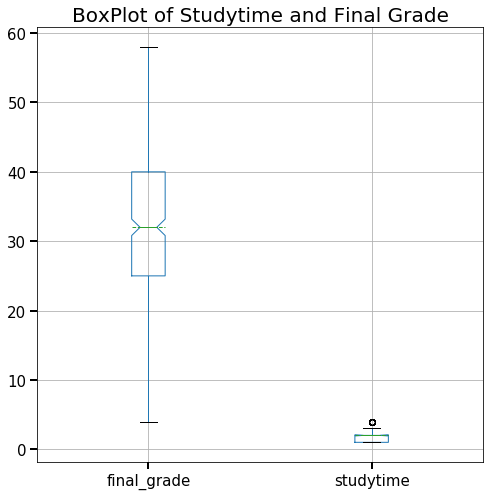

In [13]:
fig, ax = plt.subplots(figsize = (8, 8), squeeze = True)
stud.boxplot(['final_grade', 'studytime'], showmeans = True, meanline = True, ax = ax, notch = True)
ax.set_title('BoxPlot of Studytime and Final Grade', fontsize = 20)
ax.tick_params(length = 7, width = 2, labelsize = 15)
plt.show()

- **final_grade** has a larger range than **studytime**.
- Since, the minimum value of **studytime** is the *25th* percentile, **studytime** is a categorical variable.
- The distribution of **final_grade** is a continuous distribution as there are no *outliers*.
- The minimum value of **final_grade** is close to the maximum value of **studytime**.